In [2]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

from matplotlib.animation import FuncAnimation

from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import sklearn.linear_model as lm

from IPython.display import HTML

In [4]:
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
features = pd.DataFrame(boston.data, columns=boston.feature_names)
features

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [8]:
features['AGE']

0      65.2
1      78.9
2      61.1
3      45.8
4      54.2
       ... 
501    69.1
502    76.7
503    91.0
504    89.3
505    80.8
Name: AGE, Length: 506, dtype: float64

In [10]:
target=pd.DataFrame(boston.target, columns=['target'])
target

,target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [12]:
max(target['target'])

50.0

In [14]:
min(target['target'])

5.0

In [16]:
df=pd.concat([features, target], axis=1)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [18]:
df.describe().round(decimals=2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


[(0.38830460858681154, 'CRIM'), (0.3604453424505433, 'ZN'), (0.48372516002837274, 'INDUS'), (0.17526017719029868, 'CHAS'), (0.42732077237328203, 'NOX'), (0.6953599470715401, 'RM'), (0.3769545650045961, 'AGE'), (0.249928734085904, 'DIS'), (0.38162623063977735, 'RAD'), (0.4685359335677667, 'TAX'), (0.5077866855375623, 'PTRATIO'), (0.3334608196570662, 'B'), (0.7376627261740145, 'LSTAT')]


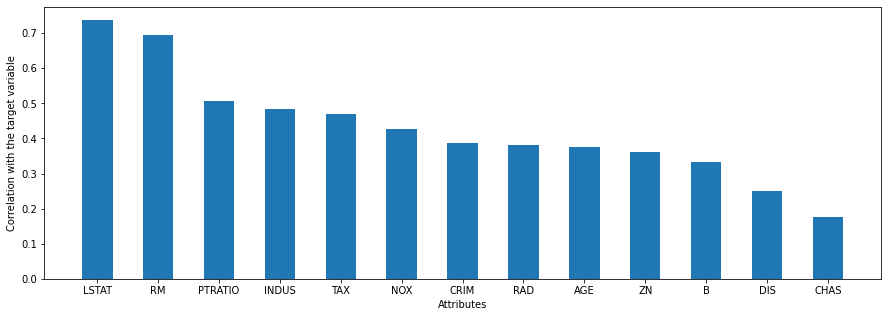

In [20]:
corr=df.corr('pearson')

corrs=[abs(corr[attr]['target']) for attr in list(features)]
#print(corrs)

l=list(zip(corrs, list(features)))
print(l)

l.sort(key = lambda x : x[0], reverse=True)
#print(l)
#print(*l)

corrs, labels = list(zip(*l)) 

#print(corrs)
#print(labels)

index = np.arange(len(labels))
plt.figure(figsize=(15, 5))
plt.bar(index, corrs, width=0.5)
plt.xlabel('Attributes')
plt.ylabel('Correlation with the target variable')
plt.xticks(index, labels)
plt.show()

In [22]:
X=df['LSTAT'].values
Y=df['target'].values

In [24]:
print(X[:5])
print(Y[:5])

[4.98 9.14 4.03 2.94 5.33]
[24.  21.6 34.7 33.4 36.2]


In [26]:
x_scaler = MinMaxScaler()
X=x_scaler.fit_transform(X.reshape(-1, 1))
#print(X[:5])
X=X[:, -1]
print(X[:5])
y_scaler = MinMaxScaler()
Y=y_scaler.fit_transform(Y.reshape(-1, 1))
#print(Y[:5])
Y=Y[:, -1]
print(Y[:5])

[0.08967991 0.2044702  0.06346578 0.03338852 0.09933775]
[0.42222222 0.36888889 0.66       0.63111111 0.69333333]


In [28]:
def error (m, x, c, t):
    N = x.size
    e = sum(((m * x + c) - t) ** 2)
    return e * (1/(2 * N))

In [30]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.2)

In [32]:
def update(m, x, c, t, learning_rate):
    grad_m = sum(2 * ((m * x + c) - t) * x)
    grad_c = sum(2 * ((m * x + c) - t))
    m = m - grad_m * learning_rate
    c = c - grad_c * learning_rate
    return m, c

In [34]:
def gradient_descent(init_m, init_c, x, t, learning_rate, iterations, error_threshold):
    m = init_m
    c = init_c
    error_values = list()
    mc_values = list()
    for i in range(iterations):
        e = error(m, x, c, t)
        if e < error_threshold:
            print("Error below the threshold value. Stopping")
            break
        error_values.append(e)
        m,c = update(m, x, c, t, learning_rate)
        mc_values.append((m, c))
    return m, c, error_values, mc_values

In [36]:
%%time
init_m = 0.9
init_c = 0
learning_rate = 0.001
iterations = 250
error_threshold = 0.001

m, c, error_values, mc_values = gradient_descent(init_m, init_c, xtrain, ytrain, learning_rate, iterations, error_threshold)

Wall time: 88.8 ms


In [38]:
mc_values_anim = mc_values[0 : 250 : 5]
mc_values_anim

[(0.8763222721885574, 0.094833476821192),
 (0.6569778458077, 0.17476159191794016),
 (0.46450389733371483, 0.23481693527795341),
 (0.2980870419849788, 0.28674178582218446),
 (0.15419972613415456, 0.33163704210118716),
 (0.029791897256556198, 0.3704543716729242),
 (-0.07777358059337425, 0.404016605190802),
 (-0.17077682749086365, 0.433035178367683),
 (-0.25118928050429995, 0.45812521264008754),
 (-0.32071548324822435, 0.4798185542097537),
 (-0.3808292179602046, 0.4985750478577438),
 (-0.4328047460115782, 0.5147922845078605),
 (-0.477743819073042, 0.5288140291634279),
 (-0.5165990335044846, 0.540937507868693),
 (-0.5501940230239278, 0.5514197081602704),
 (-0.5792409176898392, 0.5604828265625018),
 (-0.6043554392837288, 0.5683189786000531),
 (-0.6260699530775273, 0.5750942711682822),
 (-0.6448447526506869, 0.5809523235854791),
 (-0.6610778169670052, 0.5860173119645119),
 (-0.675113246536887, 0.5903966014369697),
 (-0.6872485574906594, 0.5941830220263972),
 (-0.6977409881791199, 0.597456836

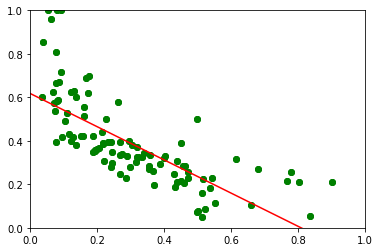

In [40]:
fig, ax = plt.subplots()
ln, = plt.plot([], [], 'ro-', animated = True)

def init():
    plt.scatter(xtest, ytest, color = 'g')
    ax.set_xlim(0, 1.0)
    ax.set_ylim(0, 1.0)
    return ln,
    
def update_frame(frame):
    m, c = mc_values_anim[frame]
    x1, y1 = -0.5, m * -0.5 + c
    x2, y2 = 1.5, m * 1.5 + c
    ln.set_data([x1, x2], [y1, y2])
    return ln,

anim = FuncAnimation(fig, update_frame, frames = range(len(mc_values_anim)),
                     init_func=init, blit=True)

HTML(anim.to_jshtml())

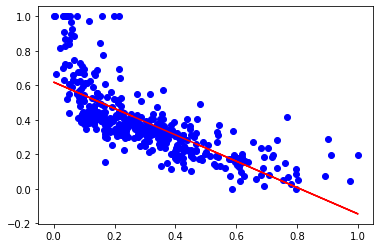

In [42]:
plt.scatter(xtrain, ytrain, color = 'b')
plt.plot(xtrain, (m * xtrain + c), color = 'r')

Text(0.5, 0, 'Iterations')

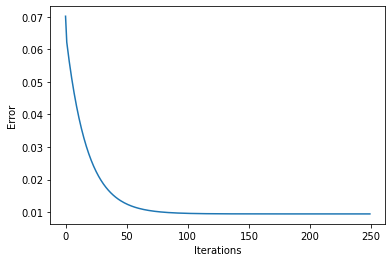

In [44]:
plt.plot(np.arange(len(error_values)), error_values)
plt.ylabel('Error')
plt.xlabel('Iterations')

In [46]:
predicted = (m * xtest) + c

In [48]:
mean_squared_error(ytest, predicted)

0.0193822262962329

In [50]:
p = pd.DataFrame(list(zip(xtest, ytest, predicted)), columns = ['x', 'target_y', 'predicted_y'])
p.head()

,x,target_y,predicted_y
0,0.091336,0.715556,0.548257
1,0.778146,0.255556,0.023824
2,0.501932,0.077778,0.234735
3,0.428808,0.246667,0.290571
4,0.286700,0.228889,0.399081


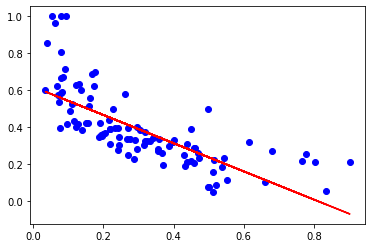

In [52]:
plt.scatter(xtest, ytest, color = 'b')
plt.plot(xtest, predicted, color = 'r')

In [55]:
predicted = np.array(predicted).reshape(-1, 1)
xtest = xtest.reshape(-1, 1)
ytest = ytest.reshape(-1, 1)

xtest_scaled = x_scaler.inverse_transform(xtest)
ytest_scaled = y_scaler.inverse_transform(ytest)
predicted_scaled = y_scaler.inverse_transform(predicted)

xtest_scaled = xtest_scaled[:, -1]
ytest_scaled = ytest_scaled[:, -1]
predicted_scaled = predicted_scaled[:, -1]

p = pd.DataFrame(list(zip(xtest_scaled, ytest_scaled, predicted_scaled)), columns = ['x', 'target_y', 'predicted_y'])
p = p.round(decimals = 2)
p.head()

,x,target_y,predicted_y
0,0.09,0.72,0.55
1,0.78,0.26,0.02
2,0.50,0.08,0.23
3,0.43,0.25,0.29
4,0.29,0.23,0.40
